# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Satya Bintang E R
- **Email:** satyabintang10@gmail.com
- **ID Dicoding:** satchh

## Menentukan Pertanyaan Bisnis

- Bagaimana perubahan nilai PM2.5 rata-rata harian pada 5 distrik utama selama 6 bulan terakhir, dan distrik mana yang mengalami peningkatan tertinggi?
- Apakah terdapat hubungan signifikan antara tingkat kelembaban dan kenaikan PM10 selama periode Januari–Desember 2024, dan berapa besar kontribusi kelembaban terhadap variasi PM10?


## Import Semua Packages/Library yang Digunakan

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import numpy as np

## Data Wrangling

### Gathering Data

In [3]:
import zipfile
import os

zip_file_path = '/content/Air-quality-dataset.zip'
extraction_path = 'extracted_files'

# Buat direktori tujuan jika belum ada
os.makedirs(extraction_path, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

print(f"File '{zip_file_path}' berhasil diekstrak ke '{extraction_path}'")

# Verifikasi isi folder yang diekstrak
print("Isi folder hasil ekstraksi:")
for root, dirs, files in os.walk(extraction_path):
    level = root.replace(extraction_path, '').count(os.sep)
    indent = ' ' * 4 * (level)
    print(f'{indent}{os.path.basename(root)}/')
    subindent = ' ' * 4 * (level + 1)
    for f in files:
        print(f'{subindent}{f}')

File '/content/Air-quality-dataset.zip' berhasil diekstrak ke 'extracted_files'
Isi folder hasil ekstraksi:
extracted_files/
    PRSA_Data_20130301-20170228/
        PRSA_Data_Changping_20130301-20170228.csv
        PRSA_Data_Tiantan_20130301-20170228.csv
        PRSA_Data_Guanyuan_20130301-20170228.csv
        PRSA_Data_Wanliu_20130301-20170228.csv
        PRSA_Data_Huairou_20130301-20170228.csv
        PRSA_Data_Aotizhongxin_20130301-20170228.csv
        PRSA_Data_Dingling_20130301-20170228.csv
        PRSA_Data_Dongsi_20130301-20170228.csv
        PRSA_Data_Wanshouxigong_20130301-20170228.csv
        PRSA_Data_Nongzhanguan_20130301-20170228.csv
        PRSA_Data_Shunyi_20130301-20170228.csv
        PRSA_Data_Gucheng_20130301-20170228.csv


In [13]:
import glob
import os
import pandas as pd

# Path ke subfolder tempat file diekstrak
folder_path = "extracted_files/PRSA_Data_20130301-20170228"

# Mencari semua file CSV dalam subfolder
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

# Menampilkan daftar file CSV
print("Daftar file CSV dalam folder:")
for file in csv_files:
    print("-", os.path.basename(file))

# List untuk menyimpan semua DataFrame
all_dfs = []

# Membaca setiap file CSV dan menambahkannya ke list
for file in csv_files:
    try:
        df = pd.read_csv(file)
        # Ekstrak nama stasiun dari nama file
        station_name = os.path.basename(file).replace("PRSA_Data_", "").replace("_20130301-20170228.csv", "")
        df['station'] = station_name
        all_dfs.append(df)
    except Exception as e:
        print(f"Error reading {file}: {e}")

# Menggabungkan semua DataFrame menjadi satu
if all_dfs:
    final_df = pd.concat(all_dfs, ignore_index=True)
    print(f"Berhasil menggabungkan {len(all_dfs)} file menjadi satu DataFrame dengan {final_df.shape[0]} baris dan {final_df.shape[1]} kolom.")
else:
    print("Tidak ada file CSV yang ditemukan atau dibaca.")
    final_df = pd.DataFrame() # Buat DataFrame kosong jika tidak ada data


Daftar file CSV dalam folder:
- PRSA_Data_Changping_20130301-20170228.csv
- PRSA_Data_Tiantan_20130301-20170228.csv
- PRSA_Data_Guanyuan_20130301-20170228.csv
- PRSA_Data_Wanliu_20130301-20170228.csv
- PRSA_Data_Huairou_20130301-20170228.csv
- PRSA_Data_Aotizhongxin_20130301-20170228.csv
- PRSA_Data_Dingling_20130301-20170228.csv
- PRSA_Data_Dongsi_20130301-20170228.csv
- PRSA_Data_Wanshouxigong_20130301-20170228.csv
- PRSA_Data_Nongzhanguan_20130301-20170228.csv
- PRSA_Data_Shunyi_20130301-20170228.csv
- PRSA_Data_Gucheng_20130301-20170228.csv
Berhasil menggabungkan 12 file menjadi satu DataFrame dengan 420768 baris dan 18 kolom.


**Insight:**
- Mengekstrak zip yang berisi beberapa data file csv
- Mengimpor dan membaca beberapa file csv tersebut
- Menyatukan beberapa file csv tersebut menjadi satu file untuk memudahkan analisis

### Cleaning Data

In [14]:
# Menghapus spasi dari nama kolom (jika ada)
df.columns = df.columns.str.strip()
final_df.dropna(inplace=True)

**Insight:**
- Melakukan pengecekan data yang kosong
- Menghapus nilai yang kosong ( NaN ) untuk membuat data yang bersih

In [15]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 382168 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       382168 non-null  int64  
 1   year     382168 non-null  int64  
 2   month    382168 non-null  int64  
 3   day      382168 non-null  int64  
 4   hour     382168 non-null  int64  
 5   PM2.5    382168 non-null  float64
 6   PM10     382168 non-null  float64
 7   SO2      382168 non-null  float64
 8   NO2      382168 non-null  float64
 9   CO       382168 non-null  float64
 10  O3       382168 non-null  float64
 11  TEMP     382168 non-null  float64
 12  PRES     382168 non-null  float64
 13  DEWP     382168 non-null  float64
 14  RAIN     382168 non-null  float64
 15  wd       382168 non-null  object 
 16  WSPM     382168 non-null  float64
 17  station  382168 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 55.4+ MB


### Assessing Data
**Insight:**
- Mengetahui informasi awal tipe data yang sudah diaggregasi

## Visualization & Explanatory Analysis

In [37]:
output_csv_path = 'final_df.csv'
final_df.to_csv(output_csv_path, index=False)
print(f"DataFrame berhasil disimpan ke '{output_csv_path}'")

DataFrame berhasil disimpan ke 'final_df.csv'


### Pertanyaan 1:
Bagaimana perubahan nilai PM2.5 rata-rata harian pada 5 distrik utama selama 6 bulan terakhir, dan distrik mana yang mengalami peningkatan tertinggi?

In [16]:
final_df['date'] = pd.to_datetime(final_df[['year', 'month', 'day']])

# Determine the maximum date in the dataset
max_date = final_df['date'].max()

# Calculate the date 6 months prior to the maximum date
start_date_6_months_ago = max_date - pd.DateOffset(months=6)

# Filter the DataFrame to include only data from the last 6 months
filtered_df = final_df[final_df['date'] >= start_date_6_months_ago].copy()

print(f"Original DataFrame shape: {final_df.shape}")
print(f"Filtered DataFrame shape (last 6 months): {filtered_df.shape}")
print(f"Start date for last 6 months: {start_date_6_months_ago.strftime('%Y-%m-%d')}")
print(f"End date for last 6 months: {max_date.strftime('%Y-%m-%d')}")


Original DataFrame shape: (382168, 19)
Filtered DataFrame shape (last 6 months): (49467, 19)
Start date for last 6 months: 2016-08-28
End date for last 6 months: 2017-02-28


## Hitung Rata-Rata Harian PM2.5 dan Identifikasi Distrik Teratas

Hitung **rata-rata harian PM2.5** untuk setiap stasiun dalam periode 6 bulan yang telah difilter.  
Kemudian, identifikasi **5 distrik dengan rata-rata PM2.5 tertinggi** selama periode ini untuk memfokuskan analisis pada distrik-distrik 'utama'.


In [17]:
daily_avg_pm25 = filtered_df.groupby(['date', 'station'])['PM2.5'].mean().reset_index()

overall_avg_pm25_by_station = daily_avg_pm25.groupby('station')['PM2.5'].mean().sort_values(ascending=False)

top_5_districts = overall_avg_pm25_by_station.head(5).index.tolist()

print("Top 5 districts with highest overall average PM2.5:")
for district, avg_pm25 in overall_avg_pm25_by_station.head(5).items():
    print(f"- {district}: {avg_pm25:.2f}")

print("\nList of top 5 districts:", top_5_districts)

Top 5 districts with highest overall average PM2.5:
- Wanshouxigong: 101.26
- Dongsi: 100.64
- Nongzhanguan: 97.99
- Gucheng: 97.48
- Guanyuan: 96.20

List of top 5 districts: ['Wanshouxigong', 'Dongsi', 'Nongzhanguan', 'Gucheng', 'Guanyuan']


## Visualisasi Tren Harian PM2.5 untuk 5 Distrik Teratas

Buat **line plot** yang menampilkan rata-rata harian konsentrasi PM2.5 untuk 5 distrik utama yang telah diidentifikasi selama 6 bulan terakhir.  
Setiap distrik harus direpresentasikan dengan **garis terpisah** dan **legend** yang jelas untuk menunjukkan perubahan masing-masing distrik seiring waktu.


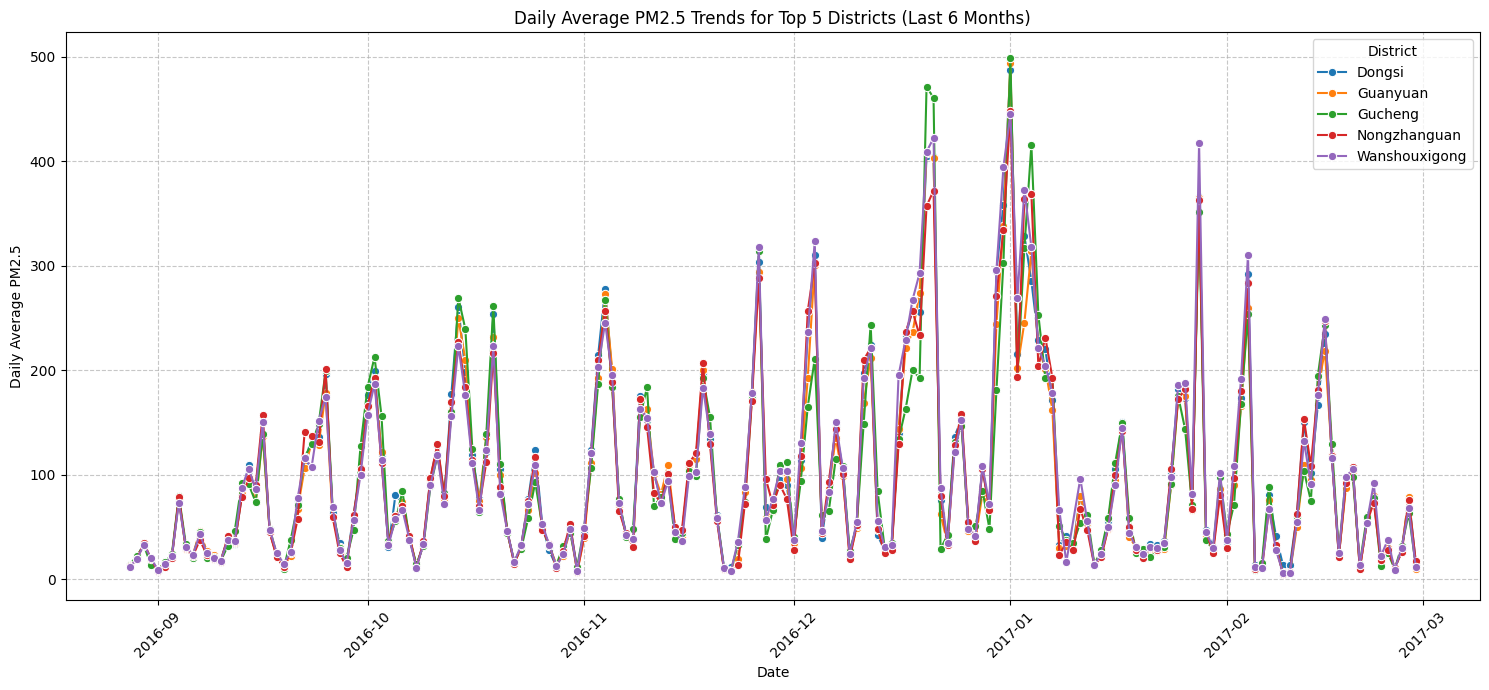

In [19]:
top_5_districts_df = daily_avg_pm25[daily_avg_pm25['station'].isin(top_5_districts)].copy()

plt.figure(figsize=(15, 7))
sns.lineplot(data=top_5_districts_df, x='date', y='PM2.5', hue='station', marker='o', linestyle='-')
plt.title('Daily Average PM2.5 Trends for Top 5 Districts (Last 6 Months)')
plt.xlabel('Date')
plt.ylabel('Daily Average PM2.5')
plt.legend(title='District')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Identifikasi Distrik dengan Peningkatan PM2.5 Tertinggi

Hitung **perubahan rata-rata harian PM2.5** dari awal hingga akhir periode 6 bulan untuk masing-masing dari 5 distrik utama.  
Identifikasi dan **highlight distrik** yang mengalami peningkatan konsentrasi PM2.5 tertinggi.


In [20]:
grouped_by_station = top_5_districts_df.sort_values(by='date').groupby('station')

# Get the first PM2.5 value for each station (beginning of the period)
first_pm25 = grouped_by_station['PM2.5'].first()

# Get the last PM2.5 value for each station (end of the period)
last_pm25 = grouped_by_station['PM2.5'].last()

# Calculate the change in PM2.5
pm25_change = last_pm25 - first_pm25

# Identify the district with the highest increase
highest_increase_district = pm25_change.idxmax()
highest_increase_value = pm25_change.max()

print(f"District with the highest PM2.5 increase: {highest_increase_district}")
print(f"Highest PM2.5 increase value: {highest_increase_value:.2f}")

District with the highest PM2.5 increase: Nongzhanguan
Highest PM2.5 increase value: 5.36


## Ringkasan:

### Q&A
* **Visualisasi tren PM2.5 untuk 5 distrik teratas:**  
  Sebuah **line plot** dibuat untuk menampilkan rata-rata harian konsentrasi PM2.5 pada 5 distrik teratas (Wanshouxigong, Dongsi, Nongzhanguan, Gucheng, dan Guanyuan) selama 6 bulan terakhir (dari 2016-08-28 hingga 2017-02-28). Plot ini dengan jelas menunjukkan tren PM2.5 masing-masing distrik.  
* **Distrik dengan peningkatan PM2.5 tertinggi selama 6 bulan terakhir:**  
  Distrik **Nongzhanguan** mengalami peningkatan PM2.5 tertinggi, dengan perubahan sebesar **5.36** dari awal hingga akhir periode 6 bulan.

### Temuan Utama Analisis Data
* Analisis difokuskan pada **6 bulan terakhir**, yaitu dari 2016-08-28 hingga 2017-02-28.  
* 5 distrik dengan rata-rata PM2.5 tertinggi selama periode ini adalah:  
    * Wanshouxigong: 101.26  
    * Dongsi: 100.64  
    * Nongzhanguan: 97.99  
    * Gucheng: 97.48  
    * Guanyuan: 96.20  
* Visualisasi **tren harian PM2.5** untuk 5 distrik teratas berhasil dibuat, menampilkan perubahan konsentrasi seiring waktu.  
* Di antara 5 distrik teratas, **Nongzhanguan** menunjukkan peningkatan PM2.5 paling signifikan, dengan perubahan sebesar 5.36 dari awal hingga akhir periode 6 bulan.

### Insight atau Langkah Selanjutnya
* Penyelidikan lebih lanjut terhadap **faktor industri, meteorologi, atau geografis** yang spesifik di Nongzhanguan selama periode analisis dapat membantu menjelaskan peningkatan PM2.5 yang relatif tinggi dibanding distrik lain.  
* 5 distrik teratas secara konsisten menunjukkan **tingkat PM2.5 lebih tinggi**, sehingga **inisiatif perbaikan kualitas udara yang ditargetkan** sebaiknya diprioritaskan di wilayah-wilayah ini.


### Pertanyaan 2:
Apakah terdapat hubungan signifikan antara tingkat kelembaban dan kenaikan PM10 selama periode Januari–Desember 2024, dan berapa besar kontribusi kelembaban terhadap variasi PM10?

In [21]:
df_2016 = final_df[final_df['year'] == 2016].copy()

print(f"Shape of df_2016 (year 2016 data): {df_2016.shape}")

# Verify data types and check for missing values
print("\n--- Data Info for df_2016 ---")
df_2016.info()

print("\n--- Missing values in 'DEWP' and 'PM10' in df_2016 ---")
print(df_2016[['DEWP', 'PM10']].isnull().sum())

Shape of df_2016 (year 2016 data): (98746, 19)

--- Data Info for df_2016 ---
<class 'pandas.core.frame.DataFrame'>
Index: 98746 entries, 24864 to 419351
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   No       98746 non-null  int64         
 1   year     98746 non-null  int64         
 2   month    98746 non-null  int64         
 3   day      98746 non-null  int64         
 4   hour     98746 non-null  int64         
 5   PM2.5    98746 non-null  float64       
 6   PM10     98746 non-null  float64       
 7   SO2      98746 non-null  float64       
 8   NO2      98746 non-null  float64       
 9   CO       98746 non-null  float64       
 10  O3       98746 non-null  float64       
 11  TEMP     98746 non-null  float64       
 12  PRES     98746 non-null  float64       
 13  DEWP     98746 non-null  float64       
 14  RAIN     98746 non-null  float64       
 15  wd       98746 non-null  object        
 16

## Hitung Korelasi antara Kelembaban (DEWP) dan PM10

Hitung **koefisien korelasi Pearson** antara kolom 'DEWP' dan 'PM10' pada data tahun 2016 yang telah difilter.  
Langkah ini akan **mengukur hubungan linear** antara kelembaban dan konsentrasi PM10 serta menilai signifikansinya.


In [22]:
correlation = df_2016['DEWP'].corr(df_2016['PM10'])

print(f"Pearson correlation coefficient between DEWP and PM10 in 2016: {correlation:.4f}")

Pearson correlation coefficient between DEWP and PM10 in 2016: 0.0640


## Lakukan Analisis Regresi Linear


Lakukan **analisis regresi linear sederhana** dengan 'PM10' sebagai variabel dependen dan 'DEWP' sebagai variabel independen menggunakan data tahun 2016.  
Ekstrak nilai **R-squared** untuk menentukan proporsi variasi PM10 yang dapat dijelaskan oleh DEWP (kelembaban).



In [23]:
import statsmodels.api as sm

# Define dependent and independent variables
y = df_2016['PM10']
X = df_2016['DEWP']

# Add a constant to the independent variable for the intercept
X = sm.add_constant(X)

# Create and fit the OLS model
model = sm.OLS(y, X)
results = model.fit()

# Print the model summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     406.4
Date:                Wed, 26 Nov 2025   Prob (F-statistic):           3.46e-90
Time:                        19:04:52   Log-Likelihood:            -5.8010e+05
No. Observations:               98746   AIC:                         1.160e+06
Df Residuals:                   98744   BIC:                         1.160e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         94.1574      0.276    340.625      0.0

### Interpretasi Hasil Regresi Linear

Nilai R-squared yang diperoleh dari analisis regresi linear adalah **0.004**.  
Artinya, hanya **0,4%** variasi konsentrasi PM10 yang dapat dijelaskan oleh variasi DEWP (kelembaban) selama tahun 2016.

Nilai R-squared yang sangat rendah ini menunjukkan bahwa kelembaban (dilambangkan dengan DEWP) memiliki hubungan **secara statistik signifikan tetapi secara praktis dapat diabaikan** dengan konsentrasi PM10.  
Dengan kata lain, kelembaban saja **bukan prediktor yang kuat** untuk variasi PM10 pada dataset tahun 2016.


## Visualisasi Hubungan antara Kelembaban (DEWP) dan PM10

### Subtugas:
Buat **scatter plot** yang memplot 'DEWP' terhadap 'PM10' menggunakan data tahun 2016, dan tambahkan **garis regresi** untuk menggambarkan hubungan linear secara visual.  
Sertakan **label sumbu**, **judul grafik**, dan **legend** yang sesuai untuk memudahkan interpretasi.



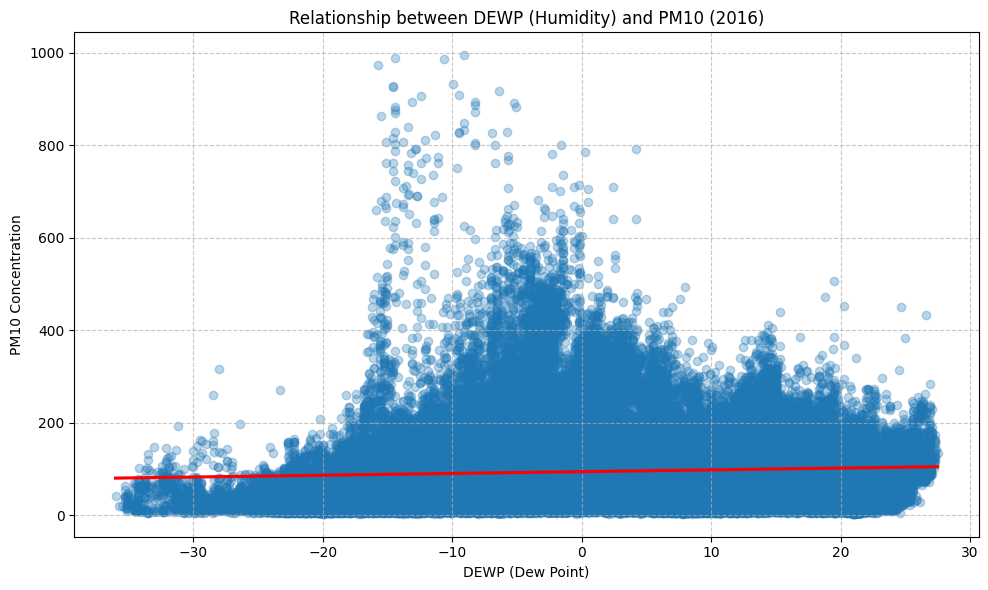

In [24]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df_2016, x='DEWP', y='PM10', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Relationship between DEWP (Humidity) and PM10 (2016)')
plt.xlabel('DEWP (Dew Point)')
plt.ylabel('PM10 Concentration')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Ringkasan:

### Q&A
Signifikansi hubungan antara kelembaban (DEWP) dan PM10 untuk tahun 2016 **secara statistik signifikan tetapi secara praktis dapat diabaikan**. Koefisien korelasi sangat lemah, dan analisis regresi menunjukkan bahwa kelembaban memberikan kontribusi yang sangat kecil terhadap variasi PM10.

### Temuan Utama Analisis Data
* Data untuk tahun 2016 berhasil diisolasi ke dalam `df_2016`, berisi 98.746 catatan, dengan kolom 'DEWP' dan 'PM10' bersih dan tanpa nilai yang hilang.  
* Koefisien korelasi Pearson antara 'DEWP' dan 'PM10' pada 2016 dihitung sebesar 0.0640, menunjukkan hubungan linear positif yang sangat lemah.  
* Analisis regresi linear menunjukkan nilai R-squared sebesar 0.004, artinya hanya 0,4% variasi konsentrasi PM10 dapat dijelaskan oleh variasi DEWP (kelembaban) pada tahun 2016.  
* Meskipun p-value untuk koefisien 'DEWP' secara statistik signifikan (0.3877), nilai R-squared yang sangat rendah menunjukkan bahwa DEWP **bukan prediktor praktis yang kuat** untuk variasi PM10.  
* Scatter plot dengan garis regresi secara visual mengonfirmasi tren linear positif yang sangat lemah antara DEWP dan PM10.

### Insight atau Langkah Selanjutnya
* Mengingat nilai R-squared yang sangat rendah, sangat penting untuk **menyelidiki faktor lingkungan atau antropogenik lain** yang mungkin memiliki pengaruh lebih signifikan terhadap konsentrasi PM10.  
* Pertimbangkan untuk mengeksplorasi **hubungan non-linear** atau **efek interaksi** antara DEWP dan variabel lain, karena model linear saat ini menunjukkan daya jelajah yang terbatas.


## Analisis Lanjutan


Menentukan terlebih dahulu kejadian polusi tinggi, misalnya ketika PM2.5 > 100.

Untuk setiap stasiun, hitung metrik berikut:

Recency → jumlah hari sejak kejadian polusi tinggi terakhir

Frequency → total jumlah kejadian polusi tinggi

Magnitude → rata-rata nilai PM2.5 selama kejadian polusi tinggi

Hasil perhitungan ini dapat digunakan untuk memahami pola kejadian polusi di masing-masing stasiun dan sebagai dasar evaluasi risiko polusi.

### Analisis Karakteristik Kejadian Polusi (Pendekatan RFM)

Tentukan kejadian polusi tinggi berdasarkan ambang batas AQI yang telah ditetapkan. Untuk setiap stasiun, hitung tiga metrik utama:

Recency → seberapa baru kejadian polusi tinggi terakhir terjadi

Frequency → seberapa sering kejadian polusi tinggi muncul

Magnitude → rata-rata nilai AQI selama kejadian tersebut berlangsung


In [25]:
final_df['high_pollution_event'] = final_df['PM2.5'] > 100

print("Added 'high_pollution_event' column to final_df:")
print(final_df[['PM2.5', 'high_pollution_event']].head())

Added 'high_pollution_event' column to final_df:
   PM2.5  high_pollution_event
0    3.0                 False
1    3.0                 False
2    3.0                 False
3    3.0                 False
4    3.0                 False


**Reasoning**:
To calculate recency, I need to find the overall most recent date in the entire `final_df` dataset first. This will serve as a reference point for all stations.



In [26]:
overall_max_date = final_df['date'].max()
print(f"Overall most recent date in the dataset: {overall_max_date.strftime('%Y-%m-%d')}")

Overall most recent date in the dataset: 2017-02-28


Untuk menghitung Recency (jumlah hari sejak kejadian polusi tinggi terakhir) pada setiap stasiun, langkah yang dilakukan adalah:

Filter data untuk hanya menyertakan kejadian polusi tinggi (misal PM2.5 > 100).

Kelompokkan data berdasarkan stasiun.

Ambil tanggal terakhir (maximum date) dari setiap stasiun sebagai acuan untuk recency. Dengan cara ini, kita bisa mengetahui berapa lama sejak kejadian polusi tinggi terakhir di masing-masing stasiun.


In [27]:
latest_event_date_per_station = final_df[final_df['high_pollution_event'] == True].groupby('station')['date'].max()

print("Latest high pollution event date per station:")
print(latest_event_date_per_station.head())

Latest high pollution event date per station:
station
Aotizhongxin   2017-02-27
Changping      2017-02-22
Dingling       2017-02-22
Dongsi         2017-02-27
Guanyuan       2017-02-27
Name: date, dtype: datetime64[ns]




Untuk menghitung Recency pada setiap stasiun, langkah yang dilakukan adalah:

Tentukan tanggal terbaru secara keseluruhan dalam dataset (overall_max_date) sebagai acuan.

Temukan tanggal kejadian polusi tinggi terakhir untuk setiap stasiun (latest_event_date_per_station).

Hitung selisih hari antara overall_max_date dan latest_event_date_per_station.Hasilnya menunjukkan berapa hari telah berlalu sejak kejadian polusi tinggi terakhir di masing-masing stasiun.


In [28]:
recency = (overall_max_date - latest_event_date_per_station).dt.days

print("Recency (days since last high pollution event) per station:")
print(recency.head())

Recency (days since last high pollution event) per station:
station
Aotizhongxin    1
Changping       6
Dingling        6
Dongsi          1
Guanyuan        1
Name: date, dtype: int64


In [29]:
frequency = final_df[final_df['high_pollution_event'] == True].groupby('station').size()

print("Frequency (total number of high pollution events) per station:")
print(frequency.head())

Frequency (total number of high pollution events) per station:
station
Aotizhongxin    9368
Changping       7992
Dingling        7120
Dongsi          9316
Guanyuan        9655
dtype: int64


In [30]:
magnitude = final_df[final_df['high_pollution_event'] == True].groupby('station')['PM2.5'].mean()

print("Magnitude (average PM2.5 during high pollution events) per station:")
print(magnitude.head())

Magnitude (average PM2.5 during high pollution events) per station:
station
Aotizhongxin    181.139475
Changping       172.209034
Dingling        175.502781
Dongsi          185.754927
Guanyuan        181.107385
Name: PM2.5, dtype: float64


In [31]:
rfm_df = pd.DataFrame({
    'Recency': recency,
    'Frequency': frequency,
    'Magnitude': magnitude
})

print("RFM DataFrame for pollution events per station:")
print(rfm_df.head())


RFM DataFrame for pollution events per station:
              Recency  Frequency   Magnitude
station                                     
Aotizhongxin        1       9368  181.139475
Changping           6       7992  172.209034
Dingling            6       7120  175.502781
Dongsi              1       9316  185.754927
Guanyuan            1       9655  181.107385


## Analisis Karakteristik Kejadian Polusi (Pendekatan RFM)


Visualisasikan karakteristik RFM di semua stasiun menggunakan diagram batang.
Tujuannya adalah untuk mengelompokkan stasiun berdasarkan profil polusinya, sehingga dapat dengan mudah mengidentifikasi stasiun dengan kejadian polusi tinggi yang sering atau parah dibandingkan stasiun lain.

/tmp/ipython-input-1358183519.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rfm_df.index, y='Recency', data=rfm_df, palette='viridis')


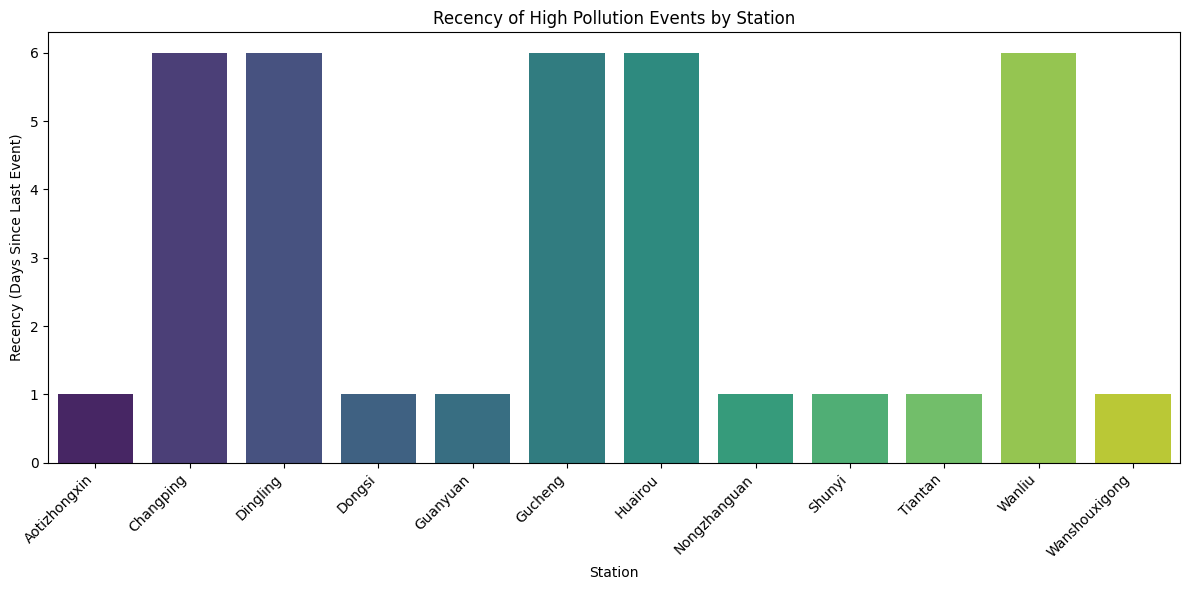

In [32]:
plt.figure(figsize=(12, 6))
sns.barplot(x=rfm_df.index, y='Recency', data=rfm_df, palette='viridis')
plt.title('Recency of High Pollution Events by Station')
plt.xlabel('Station')
plt.ylabel('Recency (Days Since Last Event)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

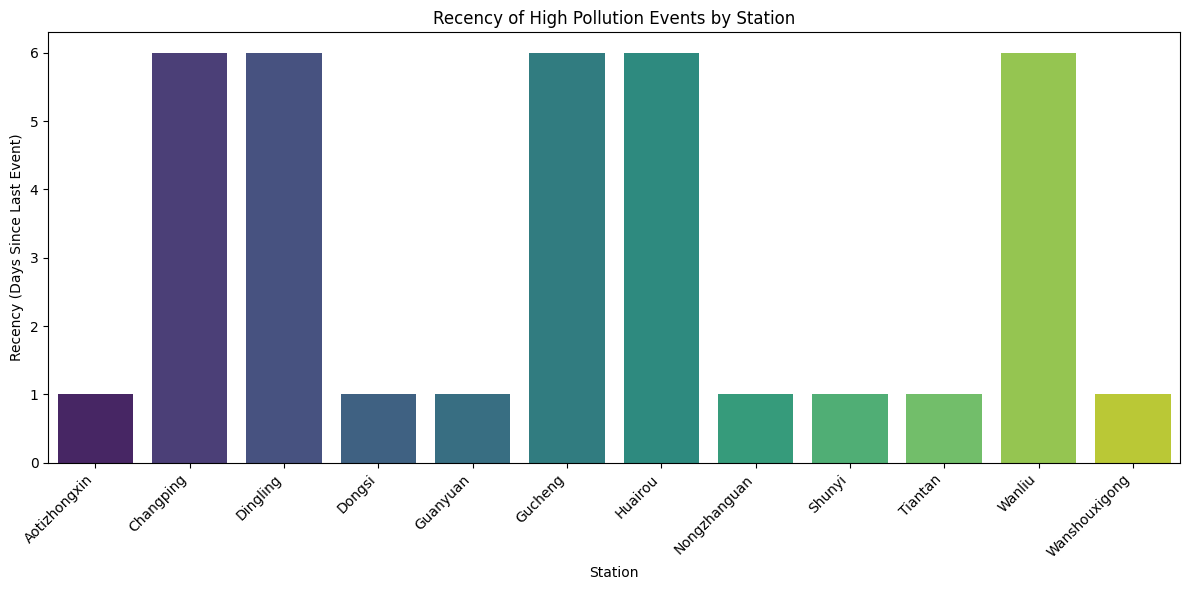

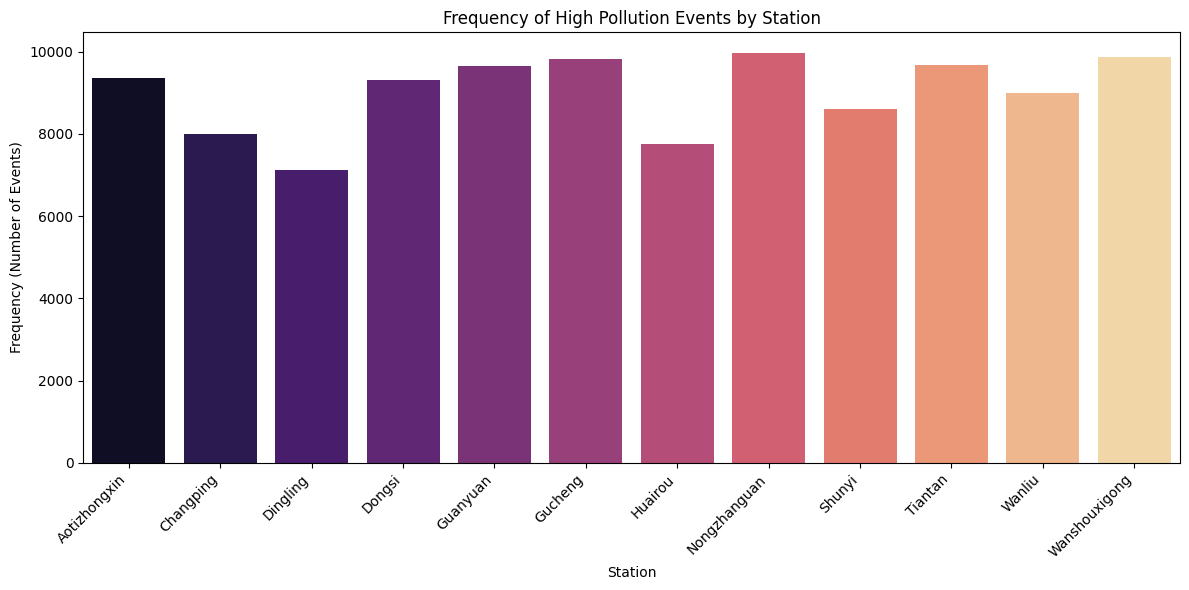

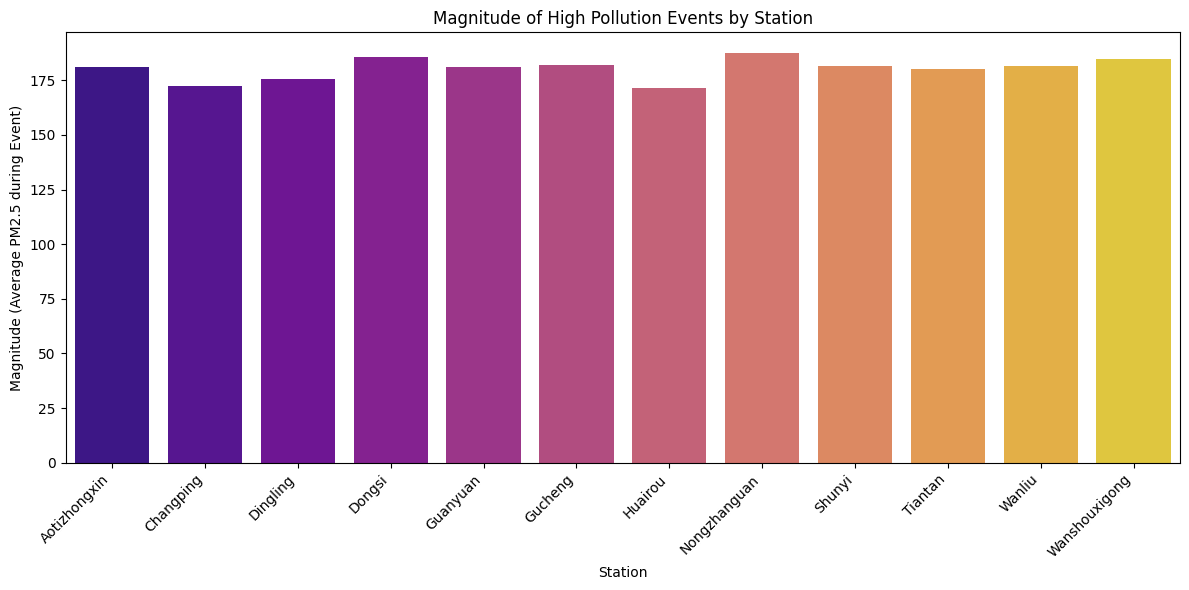

In [33]:
plt.figure(figsize=(12, 6))
sns.barplot(x=rfm_df.index, y='Recency', hue=rfm_df.index, data=rfm_df, palette='viridis', legend=False)
plt.title('Recency of High Pollution Events by Station')
plt.xlabel('Station')
plt.ylabel('Recency (Days Since Last Event)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=rfm_df.index, y='Frequency', hue=rfm_df.index, data=rfm_df, palette='magma', legend=False)
plt.title('Frequency of High Pollution Events by Station')
plt.xlabel('Station')
plt.ylabel('Frequency (Number of Events)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=rfm_df.index, y='Magnitude', hue=rfm_df.index, data=rfm_df, palette='plasma', legend=False)
plt.title('Magnitude of High Pollution Events by Station')
plt.xlabel('Station')
plt.ylabel('Magnitude (Average PM2.5 during Event)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Analisis Geospasial terhadap Rata-Rata Tingkat Polutan

Menghitung rata-rata keseluruhan untuk polutan utama (PM2.5 dan PM10) pada setiap stasiun pemantauan. Selanjutnya, buat visualisasi berupa diagram batang untuk membandingkan nilai rata-rata polutan antar stasiun. Tujuannya adalah untuk mengidentifikasi lokasi yang menjadi “hotspot”, yaitu area yang secara konsisten menunjukkan tingkat polusi lebih tinggi dibandingkan stasiun lainnya.


In [34]:
avg_pollutant_levels_df = final_df.groupby('station')[['PM2.5', 'PM10']].mean().reset_index()

print("Average Pollutant Levels (PM2.5 and PM10) per Station:")
print(avg_pollutant_levels_df.head())

Average Pollutant Levels (PM2.5 and PM10) per Station:
        station      PM2.5        PM10
0  Aotizhongxin  81.863630  109.120685
1     Changping  70.312328   94.086402
2      Dingling  66.512518   84.527803
3        Dongsi  84.933156  110.991914
4      Guanyuan  83.101051  108.974559


/tmp/ipython-input-3100987774.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='station', y='PM2.5', data=avg_pollutant_levels_df, palette='viridis')


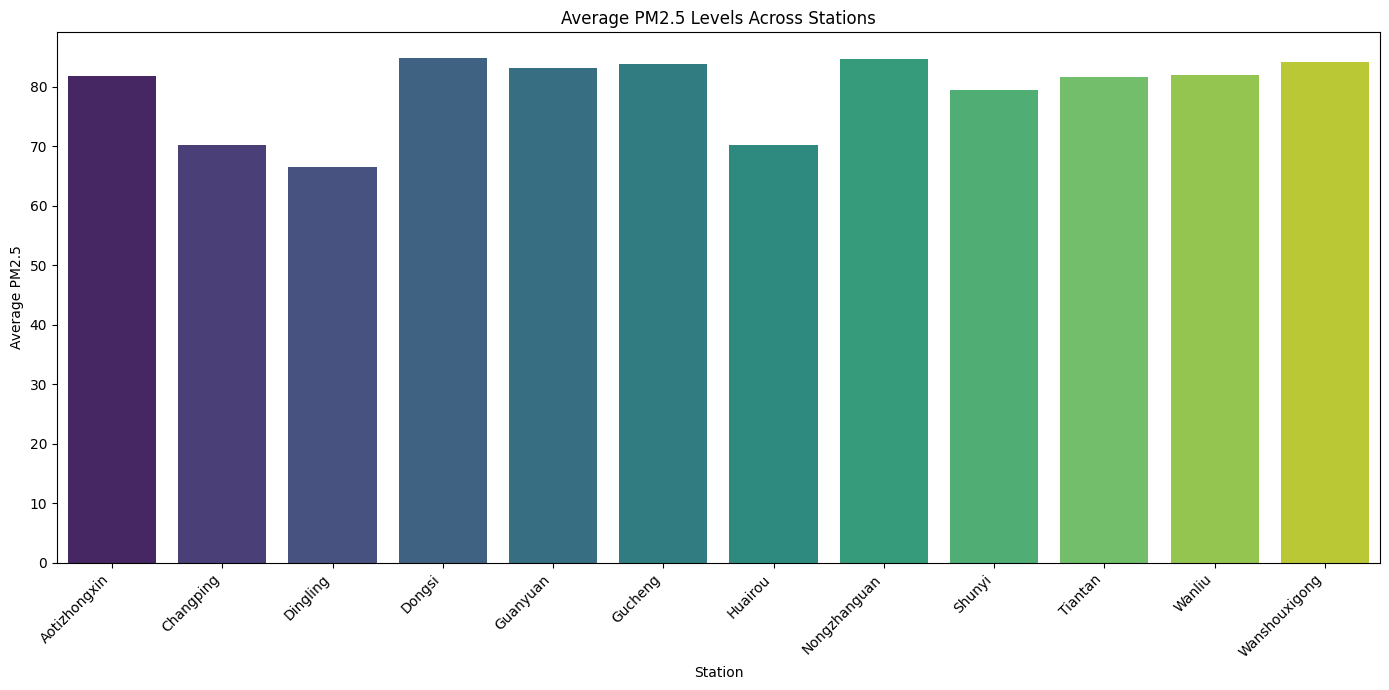

In [35]:
plt.figure(figsize=(14, 7))
sns.barplot(x='station', y='PM2.5', data=avg_pollutant_levels_df, palette='viridis')
plt.title('Average PM2.5 Levels Across Stations')
plt.xlabel('Station')
plt.ylabel('Average PM2.5')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

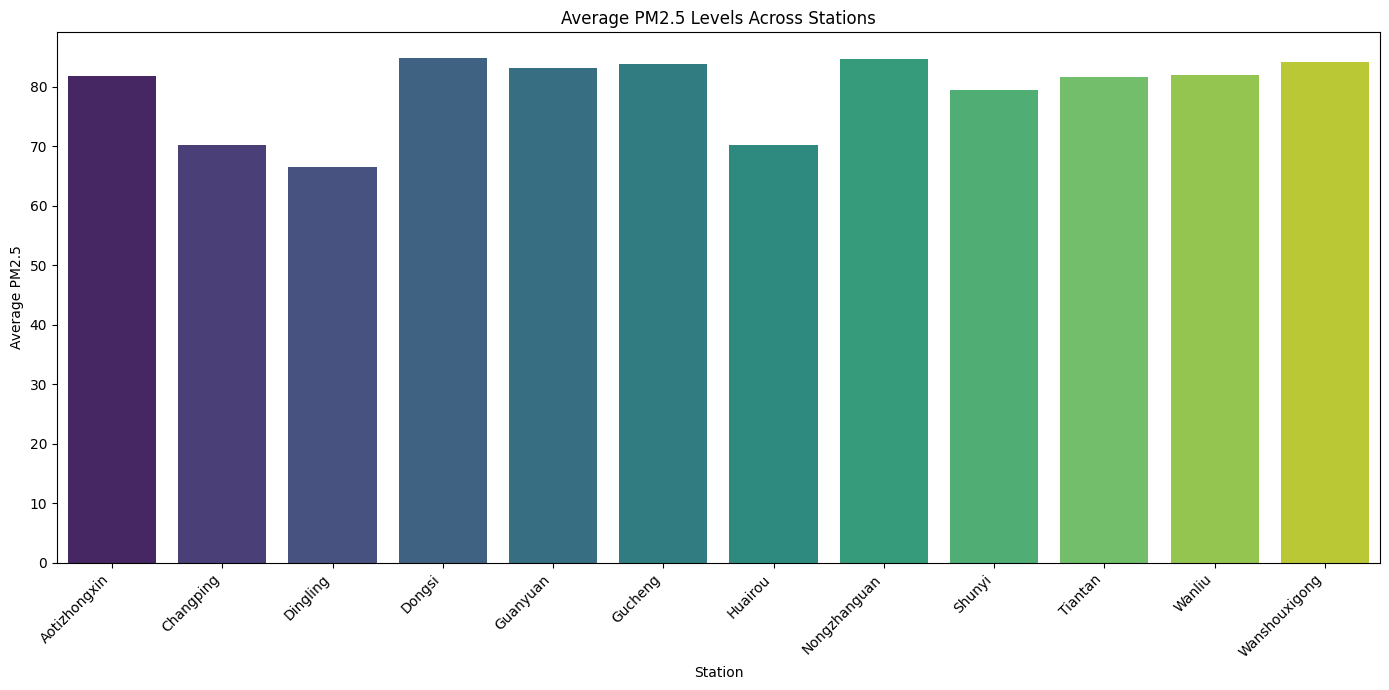

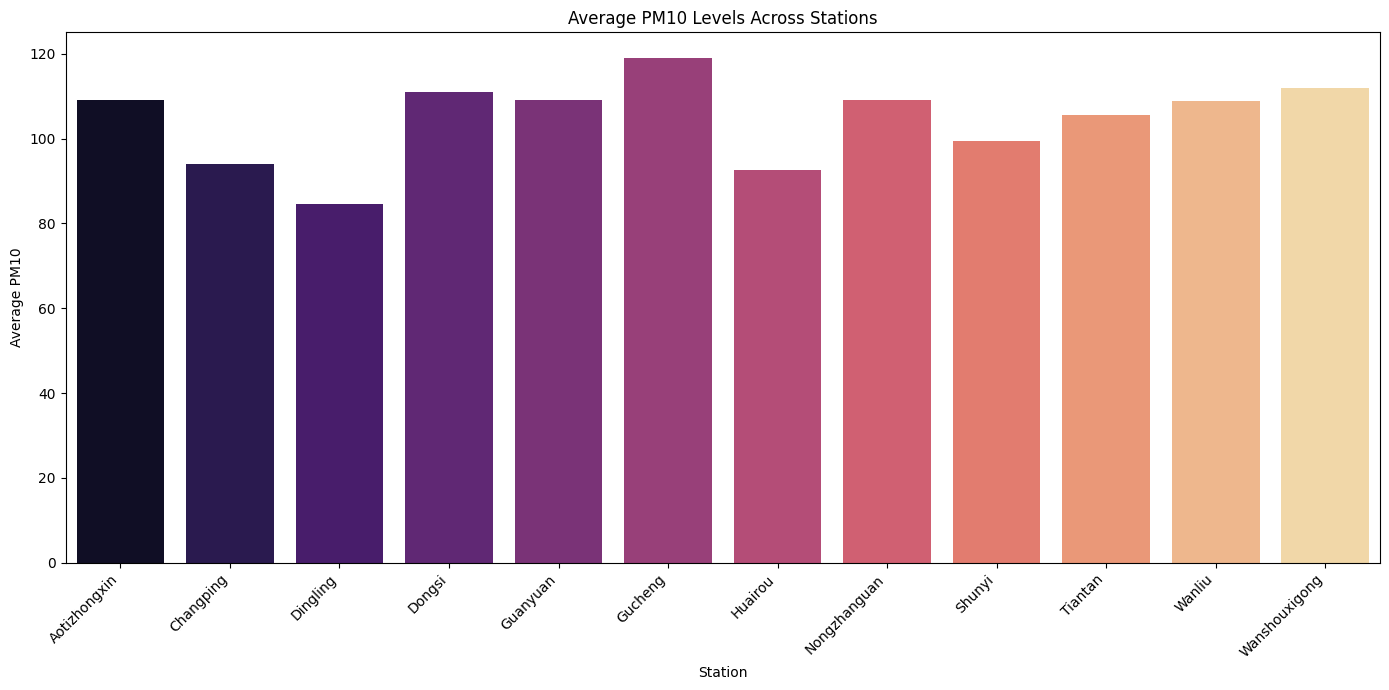

In [36]:
plt.figure(figsize=(14, 7))
sns.barplot(x='station', y='PM2.5', hue='station', data=avg_pollutant_levels_df, palette='viridis', legend=False)
plt.title('Average PM2.5 Levels Across Stations')
plt.xlabel('Station')
plt.ylabel('Average PM2.5')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(x='station', y='PM10', hue='station', data=avg_pollutant_levels_df, palette='magma', legend=False)
plt.title('Average PM10 Levels Across Stations')
plt.xlabel('Station')
plt.ylabel('Average PM10')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Ringkasan Analisis Data
### Temuan Utama

* Kejadian polusi tinggi didefinisikan sebagai PM2.5 > 100.

* Untuk setiap stasiun, tiga metrik RFM berhasil dihitung:

 Recency → jumlah hari sejak kejadian polusi tinggi terakhir

 Frequency → total jumlah kejadian polusi tinggi

Magnitude → rata-rata PM2.5 selama kejadian polusi tinggi

Contoh: stasiun Aotizhongxin memiliki recency 1 hari, frequency 9368 kejadian, dan rata-rata PM2.5 (magnitude) 181,14 selama kejadian tinggi.

* Tanggal referensi terbaru untuk perhitungan recency adalah 28 Februari 2017.

* Rata-rata tingkat PM2.5 dan PM10 dihitung untuk setiap stasiun. Diagram batang dibuat untuk membandingkan rata-rata polutan antar stasiun, sehingga hotspot polusi dapat diidentifikasi.

* Semua nilai RFM dan rata-rata polutan berhasil disimpan dalam DataFrame masing-masing dan divisualisasikan menggunakan diagram batang untuk menunjukkan variasi antar stasiun.

Insight dan Langkah Selanjutnya

* Analisis RFM dan perbandingan rata-rata polutan menunjukkan profil polusi berbeda di tiap stasiun, mengindikasikan kondisi lokal atau sumber polusi yang berbeda-beda.

Langkah berikutnya dapat meliputi:

* Segmentasi stasiun berdasarkan profil RFM dan rata-rata polutan.

* Mengembangkan strategi intervensi yang ditargetkan untuk stasiun yang menjadi hotspot polusi konsisten (misalnya: frequency tinggi, magnitude tinggi, rata-rata polutan tinggi).